PERRET / MORI / DUPONT / POTIRON
# Projet Bayes: 

In [4]:
## test le titre

In [17]:
#Bibliothèques
import numpy as np
import numpy.random as rnd
import scipy as sp
import matplotlib.pyplot as plt

In [25]:
#Import des données
N = 12
T = np.array([11, 11, 17, 22, 9, 6, 5, 14, 9, 7, 22, 51])
X = np.array([6, 9, 17, 22, 7, 5, 5, 14, 9, 7, 9, 51])
Y = np.array([5, 2, 0, 0, 2, 1, 0, 0, 0, 0, 13, 0])

In [26]:
#Fonctions utiles
Sigmoid = lambda x: 1/(1+np.exp(-x))

<ipython-input-33-0400d8fbbd10>:33: RuntimeWarning: divide by zero encountered in log
  top = (np.log(Theta + (1-Theta)*(1-P_star)**T_0)).sum() + (Y_1*np.log(P_star)+X_1*np.log(1-P_star)).sum() - Alpha_star**2/(2*1e4)
<ipython-input-33-0400d8fbbd10>:41: RuntimeWarning: divide by zero encountered in log
  top = (np.log(Theta_star + (1-Theta_star)*(1-P)**T_0)).sum() + len(X_1)*np.log(1-Theta_star) - Delta_star**2/(2*1e4)


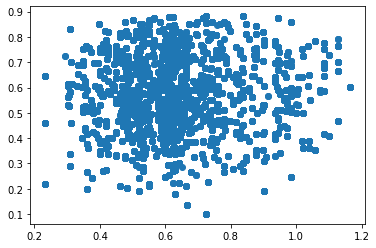

In [33]:
n = 100000
dim_param = 2

#On sépare les données en y=0/y<>0
X_0 = X[Y == 0]
X_1 = X[Y != 0]
Y_0 = Y[Y == 0]
Y_1 = Y[Y != 0]
T_0 = T[Y == 0]
T_1 = T[Y != 0]

#Création de theta = [alpha, delta]
param_0 = [0.0 for k in range(dim_param)]
param = np.array([param_0]*(n+1))

#Mise en route
for t in range(1,n+1):
    param[t] = param[t-1]
    
    #Propositions 
    Alpha = param[t][0]
    Alpha_star = rnd.normal(loc=Alpha, scale=100)
    Delta = param[t][1]
    Delta_star = rnd.normal(loc=Delta, scale=100)
    
    #Remise à l'échelle
    P = Sigmoid(Alpha)
    P_star = Sigmoid(Alpha_star)
    Theta = Sigmoid(Delta)
    Theta_star = Sigmoid(Delta_star)
    
    #Alpha
    top = (np.log(Theta + (1-Theta)*(1-P_star)**T_0)).sum() + (Y_1*np.log(P_star)+X_1*np.log(1-P_star)).sum() - Alpha_star**2/(2*1e4)
    bottom = (np.log(Theta + (1-Theta)*(1-P)**T_0)).sum() + (Y_1*np.log(P)+X_1*np.log(1-P)).sum() - Alpha**2/(2*1e4)
    proba_accep = min(1,np.exp(top-bottom))
    U = rnd.uniform(low=0,high=1)
    if U<proba_accep:
        param[t][0] = Alpha_star
        
    #Delta
    top = (np.log(Theta_star + (1-Theta_star)*(1-P)**T_0)).sum() + len(X_1)*np.log(1-Theta_star) - Delta_star**2/(2*1e4)
    bottom = (np.log(Theta + (1-Theta)*(1-P)**T_0)).sum() + len(X_1)*np.log(1-Theta) - Delta**2/(2*1e4)
    proba_accep = min(1,np.exp(top-bottom))
    U = rnd.uniform(low=0,high=1)
    if U<proba_accep:
        param[t][1] = Delta_star
    
plt.scatter(np.exp(param[:,0]),Sigmoid(param[:,1]))